In [3]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()

world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도.mean(axis=1)

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()

In [58]:
수출량.loc['Argentina']*(world_transport.loc['Argentina']['Brazil'])

a    6.921501e+09
Name: Argentina, dtype: float64

In [59]:
(world_transport.loc['Argentina']['Brazil'])

0.21023919230769234

In [60]:
수출량.loc['Argentina']

a    3.292203e+10
Name: Argentina, dtype: float64

In [61]:
world_GDP_change.loc['Argentina']

a    2.035995e+11
Name: Argentina, dtype: float64

In [62]:
수출량.loc['Argentina']/world_GDP_init.loc['Argentina']

a    0.1617
Name: Argentina, dtype: float64

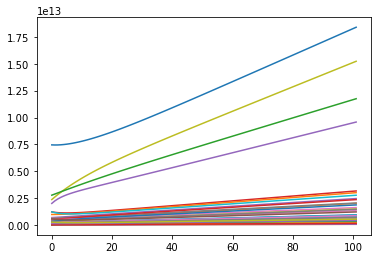

In [63]:
K=0.032

for i in c_list:
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

for k in range(100):
    for i in c_list:
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
world_GDP.columns=range(102)
plt.plot(world_GDP.transpose())
plt.show()


In [64]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

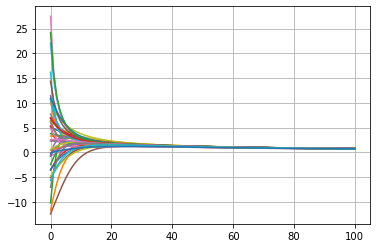

In [65]:
plt.plot(GDP_grad.transpose()[:-1])
plt.grid(True)

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('./data/world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()

world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도['2010 수출']

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()

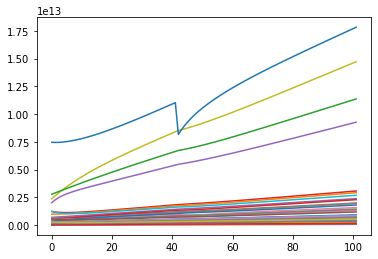

In [67]:
K=0.032

for i in c_list:
    
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

for k in range(100):
    for i in c_list:
        if(i =='United States' and k ==40):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.7
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
world_GDP.columns=range(102)
plt.plot(world_GDP.transpose())
plt.show()


In [68]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

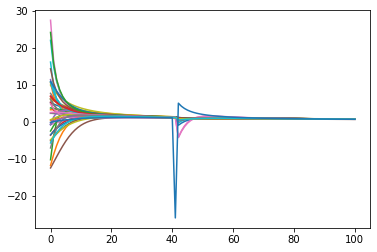

In [69]:
plt.plot(GDP_grad.transpose()[:-1])

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')

c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)

world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
world_GDP_init.columns=(['a'])
world_GDP_change=world_GDP_init.copy()
world_GDP=world_GDP_init.copy()

world_transport = pd.read_csv('WITS-Partner-Timeseries Export.csv',encoding='CP949')
world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

world_transport['mean']=world_transport.mean(axis=1)
world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
world_transport=world_transport.fillna(0).sort_index()

world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
for i in world_transport_volume.index:
    if i not in c_list:
        world_transport_volume=world_transport_volume.drop(i)
df2 = pd.read_csv('세계 GDP.csv',encoding='CP949')
무역의존도 = pd.read_csv('무역의존도.csv',encoding='CP949')
무역의존도=무역의존도.set_index('Country')
수출 = 무역의존도['2010 수출']

수출=수출/100
world_transport=world_transport/100

수출량 = 수출 * world_GDP_init.sort_index().transpose()
수출량=수출량.transpose()
수출량=수출량.dropna()

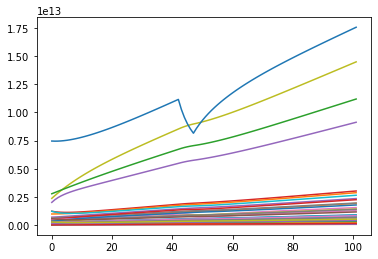

In [71]:
K=0.032

for i in c_list:
    
    for j in c_list:
        world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
    world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

for k in range(100):
    for i in c_list:
        if(i =='United States' and k >40 and k<=45):
            world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.9
        for j in c_list:
            world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
            world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
        world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
world_GDP.columns=range(102)
plt.plot(world_GDP.transpose())
plt.show()


In [72]:
GDP_grad=world_GDP.copy()
for i in range(0,101):
    GDP_grad[i]=((world_GDP[i+1]-world_GDP[i])/world_GDP[i])*100

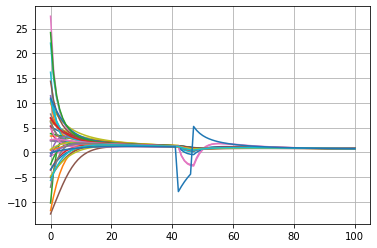

In [73]:
plt.plot(GDP_grad.transpose()[:-1])
plt.grid(True)

In [56]:
GDP_grad.loc['United States'][35:50]

35    1.137930
36    1.129967
37    1.121728
38    1.113260
39    1.104606
40    1.095802
41    1.086882
42   -7.940986
43   -6.884139
44   -5.950613
45   -5.131642
46   -4.416704
47    5.224143
48    4.429020
49    3.836713
Name: United States, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
world_GDP = pd.read_csv('world GDP.csv',encoding='CP949')
world_GDP=world_GDP.set_index('Country')
world_risk_list=dict()
c_list =list(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States'])
for i in world_GDP.index:
    if i not in c_list:
        world_GDP=world_GDP.drop(i)
for country in c_list:
    print(country)
    world_GDP = pd.read_csv('world GDP.csv',encoding='CP949')
    world_GDP=world_GDP.set_index('Country')

    

    world_GDP_init=pd.DataFrame(world_GDP.mean(axis=1)).sort_index()
    world_GDP_init.columns=(['a'])
    world_GDP_change=world_GDP_init.copy()
    world_GDP=world_GDP_init.copy()

    world_transport = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
    world_transport=world_transport[world_transport['Reporter Name'].isin(c_list)]
    world_transport=world_transport[world_transport['Partner Name'].isin(c_list)]

    world_transport['mean']=world_transport.mean(axis=1)
    world_transport=pd.pivot_table(world_transport,index='Reporter Name',columns='Partner Name',values='mean')
    world_transport=world_transport.fillna(0).sort_index()

    world_transport_volume = pd.read_csv('./data/WITS-Partner.csv',encoding='CP949')
    world_transport_volume=world_transport_volume.set_index('Partner Name').sort_index()
    for i in world_transport_volume.index:
        if i not in c_list:
            world_transport_volume=world_transport_volume.drop(i)
    df2 = pd.read_csv('./data/세계 GDP.csv',encoding='CP949')
    무역의존도 = pd.read_csv('./data/무역의존도.csv',encoding='CP949')
    무역의존도=무역의존도.set_index('Country')
    수출 = 무역의존도['2010 수출']

    수출=수출/100
    world_transport=world_transport/100

    수출량 = 수출 * world_GDP_init.sort_index().transpose()
    수출량=수출량.transpose()
    수출량=수출량.dropna()
    K=0.032

    for i in c_list:
        for j in c_list:
            world_GDP_change.loc[i] += 수출량.loc[i]*(world_transport.loc[i][j])
            world_GDP_change.loc[j] -= 수출량.loc[i]*(world_transport.loc[i][j])
        world_GDP_change.loc[i]+=K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
    world_GDP=pd.concat([world_GDP_init,world_GDP_change],axis=1)

    for k in range(100):
        for i in c_list:
            if(i ==country and k >40 and k<=45):
                world_GDP_change.loc[i]=world_GDP_change.loc[i]*0.9
            for j in c_list:
                world_GDP_change.loc[i] += (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j] 
                world_GDP_change.loc[j] -= (world_GDP.loc[j][-1]/world_GDP_init.loc[j])*수출량.loc[i]*world_transport.loc[i][j]
            world_GDP_change.loc[i] += K*world_GDP_init.loc[i]*(1-(수출량.loc[i]/world_GDP_init.loc[i]))
        world_GDP=pd.concat([world_GDP,world_GDP_change],axis=1)
    world_GDP.columns=range(102)
    world_risk_list[country]=(world_GDP)


Argentina
Australia
Austria
Belgium
Brazil
Bulgaria
Canada
Chile
China
Czech Republic
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
India
Indonesia
Ireland
Israel
Italy
Japan
Korea, Rep.
Latvia
Lithuania
Mexico
Netherlands
New Zealand
Norway
Poland
Portugal
Slovak Republic
Slovenia
South Africa
Spain
Sweden
Switzerland
Turkey
United Kingdom
United States


In [7]:
world_risk_list

{'Argentina':                              0             1             2             3    \
 Country                                                                      
 Afghanistan         7.238186e+09  7.238186e+09  7.238186e+09  7.238186e+09   
 Albania             6.656274e+09  6.656274e+09  6.656274e+09  6.656274e+09   
 Algeria             6.925905e+10  6.925905e+10  6.925905e+10  6.925905e+10   
 American Samoa      5.847647e+08  5.847647e+08  5.847647e+08  5.847647e+08   
 Andorra             1.567635e+09  1.567635e+09  1.567635e+09  1.567635e+09   
 ...                          ...           ...           ...           ...   
 West Bank and Gaza  7.845124e+09  7.845124e+09  7.845124e+09  7.845124e+09   
 World               2.913472e+13  2.913472e+13  2.913472e+13  2.913472e+13   
 Yemen, Rep.         1.842105e+10  1.842105e+10  1.842105e+10  1.842105e+10   
 Zambia              7.271020e+09  7.271020e+09  7.271020e+09  7.271020e+09   
 Zimbabwe            7.477844e+09  7.47

In [12]:
import pickle

# load
with open('./data/world_risk_list.pickle', 'rb') as f:
    data2 = pickle.load(f)

In [13]:
data2

{'Argentina':                              0             1             2             3    \
 Country                                                                      
 Afghanistan         7.238186e+09  7.238186e+09  7.238186e+09  7.238186e+09   
 Albania             6.656274e+09  6.656274e+09  6.656274e+09  6.656274e+09   
 Algeria             6.925905e+10  6.925905e+10  6.925905e+10  6.925905e+10   
 American Samoa      5.847647e+08  5.847647e+08  5.847647e+08  5.847647e+08   
 Andorra             1.567635e+09  1.567635e+09  1.567635e+09  1.567635e+09   
 ...                          ...           ...           ...           ...   
 West Bank and Gaza  7.845124e+09  7.845124e+09  7.845124e+09  7.845124e+09   
 World               2.913472e+13  2.913472e+13  2.913472e+13  2.913472e+13   
 Yemen, Rep.         1.842105e+10  1.842105e+10  1.842105e+10  1.842105e+10   
 Zambia              7.271020e+09  7.271020e+09  7.271020e+09  7.271020e+09   
 Zimbabwe            7.477844e+09  7.47

In [6]:
import pickle
with open('world_risk_list.pickle', 'rb') as fr:
    world_risk_list = pickle.load(fr)

FileNotFoundError: [Errno 2] No such file or directory: 'world_risk_list.pickle'

In [14]:
risk_influ=dict()
for i in c_list:
    risk_influ[i]=world_risk_list[i].mean().mean()

In [15]:
risk_influ=pd.DataFrame([risk_influ])

In [16]:
risk_influ=risk_influ.transpose()
risk_influ.columns=['value']
risk_influ.sort_values(by='value')

,value
United States,1.028221e+12
China,1.029853e+12
Japan,1.031722e+12
Germany,1.032854e+12
France,1.035993e+12
Italy,1.036201e+12
Brazil,1.036366e+12
United Kingdom,1.036406e+12
"Korea, Rep.",1.036590e+12
India,1.036598e+12


In [17]:
kr_risk_influ=dict()
for i in c_list:
    kr_risk_influ[i]=world_risk_list[i].sum()

In [18]:
kr_risk=dict()
for i in c_list:
    kr_risk[i]=world_risk_list[i].loc['Korea, Rep.'].mean()

In [19]:
kr_risk=pd.DataFrame([kr_risk]).transpose()

In [20]:
kr_risk.columns=['value']
kr_risk.sort_values(by='value')

,value
China,1.419652e+12
United States,1.424307e+12
Japan,1.439976e+12
"Korea, Rep.",1.452756e+12
Germany,1.454750e+12
France,1.472286e+12
Italy,1.473391e+12
United Kingdom,1.474146e+12
Australia,1.474311e+12
Brazil,1.474463e+12


In [31]:
world_risk_influ=dict()
for i in c_list:
    a=0
    for j in c_list:
        a+=world_risk_list[j].transpose().sum()[i]
        world_risk_influ[i]=a

In [33]:

world_risk_influ=pd.DataFrame([world_risk_influ]).transpose()

In [35]:
world_risk_influ.columns=['value']
world_risk_influ.sort_values(by='value')

,value
Estonia,1.905185e+14
Latvia,2.040654e+14
Bulgaria,3.033209e+14
Greece,3.737551e+14
Slovenia,4.063623e+14
Lithuania,4.536313e+14
Portugal,4.787283e+14
New Zealand,6.111077e+14
Israel,6.489773e+14
Finland,9.367726e+14


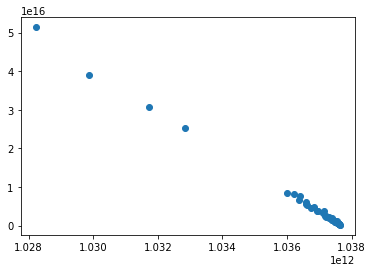

In [56]:
plt.scatter(risk_influ,world_risk_influ)

In [49]:
data=pd.concat([risk_influ,world_risk_influ,kr_risk],axis=1)

In [52]:
data.columns=['from_influ','to_influ','kr_influ']

In [53]:
data.to_csv('./datainflu.csv')